In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from random import randint
from math import sqrt

In [18]:
def read(name):
    with open(str(name) + ".txt", "r") as file:
        labels = int(file.readline())
        train = [[float(x) for x in file.readline().split()] for _ in range(int(file.readline()))]
        test  = [[float(x) for x in file.readline().split()] for _ in range(int(file.readline()))]
    return np.asarray(train), np.asarray(test)


def split(df):
    ys = df[:, -1]
    xs = df[:, :-1]
    xs = np.append(xs, [[1]] * len(xs), axis=1)
    return xs, ys


def NRSME(orig, predicted):
    return sqrt(sum(map(lambda p: (p[0] - p[1])**2, zip(orig, predicted))) / len(orig)) / (max(orig) - min(orig))


def least_squares(x_train, y_train, t):
    v, d, ut = np.linalg.svd(x_train, full_matrices=False)
    vt = v.transpose()
    d = np.diag(d)
    u = ut.transpose()
    In = np.identity(len(d))
    return u @ np.linalg.inv(d @ d + t*In) @ d @ vt @ y_train


def stochastic_gradient_descent(x_train, y_train, t, n=2000, h=0.001):
    w = np.array([0] * (len(x_train.transpose())))
    for i in range(n):
        r = randint(0, len(x_train) - 1)
        x = x_train[r]
        y = y_train[r]
        gradient = 2 * (y - (w @ x)) * (-1) * x
        w = w * (1 - h*t) - gradient * h
        h /= 1.001
    return w


def optimize(algorithm, x_train, x_test, y_train, y_test, return_all=False):
    ts = [t / 80 for t in range(-50, 50 + 1)]
    records = {}
    for t in ts:    
        records[t] = NRSME(y_test, x_test @ algorithm(x_train, y_train, t))
    return records if return_all else min(records, key=records.get)


def run(i):
    train, test = read(i)

    scaler = StandardScaler()
    scaler.fit(train)
    train = scaler.transform(train)
    test = scaler.transform(test)

    x_train, y_train = split(train)
    x_test, y_test = split(test)

    # for algorithm in [least_squares, stochastic_gradient_descent]:
    #     t = optimize(algorithm, x_train, x_test, y_train, y_test)
    #     print("                 Algorithm: ", algorithm.__name__)
    #     print("                     NRSME: ", NRSME(y_test, x_test @ algorithm(x_train, y_train, t)))
    #     print("Regularization coefficient: ", t)

    # plt.xlabel("Regularization coefficient")
    # plt.ylabel("NRSME of stochastic gradient descent", rotation=0, labelpad=100)
    # for x,y,label in zip([x_train, x_test], [y_train, y_test], ["train", "test"]):
    #     records = optimize(stochastic_gradient_descent, x_train, x, y_train, y, return_all=True)
    #     plt.plot(list(records.keys()), list(records.values()), label=label)
    # plt.show()
    
    plt.xlabel('Amount of iterations')
    plt.ylabel('NRMSE')
    records = {}
    for n in range(50, 500):
        records[n] = NRSME(y_test, x_test @ stochastic_gradient_descent(x_train, y_train, 0, n=n))
    plt.plot(list(records.keys()), list(records.values()))

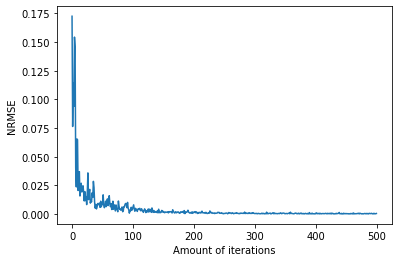

In [19]:
run(1)